### Author: Carmen Alonso Martínez

<h1>Data Wrangling</h1>

<h3>Welcome!</h3>

By the end of this notebook, you will have learned the basics of Data Wrangling! 

<h2>Table of content</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="#identify_handle_missing_values">Identify and handle missing values</a>
        <ul>
            <li><a href="#identify_missing_values">Identify missing values</a></li>
            <li><a href="#deal_missing_values">Deal with missing values</a></li>
            <li><a href="#correct_data_format">Correct data format</a></li>
        </ul>
    </li>
    <li><a href="#data_standardization">Data standardization</a></li>
    <li><a href="#data_normalization">Data Normalization (centering/scaling)</a></li>
    <li><a href="#binning">Binning</a></li>
    <li><a href="#indicator">Indicator variable</a></li>
</ul>
    
Estimated Time Needed: <strong>30 min</strong>
</div>
 
<hr>

<h2>What is the purpose of Data Wrangling?</h2>

Data Wrangling is the process of converting data from the initial format to a format that may be better for analysis.

<h3>What is the fuel consumption (L/100k) rate for the diesel car?</h3>

<h3>Import data</h3>
<p>
You can find the "Automobile Data Set" from the following link: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data">https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a>. 
We will be using this data set throughout this course.
</p>

<h4>Import pandas</h4> 

In [1]:
import pandas as pd
import matplotlib.pylab as plt

<h2>Reading the data set from the URL and adding the related headers.</h2>

URL of the dataset

This dataset was hosted on IBM Cloud object 

In [2]:
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

 Python list <b>headers</b> containing name of headers 

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Use the Pandas method <b>read_csv()</b> to load the data from the web address. Set the parameter  "names" equal to the Python list "headers".

In [4]:
df = pd.read_csv(filename, names = headers)

 Use the method <b>head()</b> to display the first five rows of the dataframe. 

In [8]:
# To see what the data set looks like, we'll use the head() method.
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


If we want to see all the columns of the dataframe, we set the pandas option as follows:

In [9]:
pd.set_option('display.max_columns', None)

If we want to see all the columns of the dataframe, we set the pandas option as follows:

In [10]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis. 
<div>So, how do we identify all those missing values and deal with them?</div> 


<b>How to work with missing data?</b>

Steps for working with missing data:
<ol>
    <li>dentify missing data</li>
    <li>deal with missing data</li>
    <li>correct data format</li>
</ol>

<h2 id="identify_handle_missing_values">Identify and handle missing values</h2>


<h3 id="identify_missing_values">Identify missing values</h3>
<h4>Convert "?" to NaN</h4>
In the car dataset, missing data comes with the question mark "?".
We replace "?" with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience. Here we use the function: 
 <pre>.replace(A, B, inplace = True) </pre>
to replace A by B

In [11]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h4>Evaluating for Missing Data</h4>

The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [12]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Aquí aprovecha que True = 1 y False = 0 para sumar.

Esta es la forma práctica de hacerlo. Veamos ahora la forma bonita:

In [19]:
df['normalized-losses'].isna().sum()

41

Así dice la profesora que lo haría ella.

In [21]:
df['normalized-losses'].value_counts()

161    11
91      8
150     7
104     6
134     6
128     6
74      5
65      5
102     5
94      5
168     5
103     5
85      5
95      5
106     4
122     4
93      4
148     4
118     4
154     3
115     3
101     3
137     3
83      3
125     3
164     2
81      2
110     2
197     2
153     2
113     2
145     2
87      2
192     2
158     2
119     2
89      2
108     2
129     2
194     2
188     2
98      1
78      1
256     1
231     1
121     1
107     1
77      1
90      1
142     1
186     1
Name: normalized-losses, dtype: int64

In [20]:
len(df['normalized-losses'].value_counts())

51

Otro ejemplo, REV (no lo he escrito del todo bien, creo).

"True" stands for missing value, while "False" stands for not missing value.

<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False"  means the value is present in the dataset.  In the body of the for loop the method  ".value_counts()"  counts the number of "True" values. 
</p>

In [23]:
df['normalized-losses'].value_counts(dropna=False).nlargest(5)

NaN    41
161    11
91      8
150     7
134     6
Name: normalized-losses, dtype: int64

In [24]:
missing_data['normalized-losses'].value_counts()

False    164
True      41
Name: normalized-losses, dtype: int64

In [25]:
missing_data.columns # Obsérvese que en la lista los elementos ya aparecen como string.

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [28]:
# for column in missing_data.columns.values.tolist():
for column in missing_data.columns:
    print(column) # Obsérvese que no hay que añadir las comillas por lo que hemos visto en la caja anterior.
    print(missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data, seven columns containing missing data:
<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>

<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on other functions
    </li>
</ol>

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>

<h4>Calculate the average of the column </h4>

df['normalized-losses'].mean()

No se puede hacer así porque esta serie (lista) sigue siendo un objeto, sigue siendo de texto. Por lo tanto, Python no puede hacerle la media directamente.

In [32]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


Por eso, lo primero que hacemos aquí es pasar los números en formato caracter a formato número (en este caso float). *Nota*: si los números están separados por comas, en lugar de por puntos, no lo hace ¡cuidado con eso!

<h4>Replace "NaN" by mean value in "normalized-losses" column</h4>

In [33]:
df["normalized-losses"].replace(np.nan, avg_norm_loss)

0      122
1      122
2      122
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object

Esto está bien, pero no es lo que más se usa.

In [35]:
df[["normalized-losses"]].fillna(avg_norm_loss)

,normalized-losses
0,122
1,122
2,122
3,164
4,164
...,...
200,95
201,95
202,95
203,95


Esto es lo que más se usa en pandas. Por último...

In [36]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

<h4>Calculate the mean value for 'bore' column</h4>

In [53]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810957


<h4>Replace NaN by mean value</h4>

In [54]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1: </h1>

<b>According to the example above, replace NaN in "stroke" column by mean.</b>
</div>

In [55]:
# Write your code below and press Shift+Enter to execute 


Double-click <b>here</b> for the solution.

<!-- The answer is below:

# calculate the mean vaule for "stroke" column
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

# replace NaN by mean value in "stroke" column
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

-->


<h4>Calculate the mean value for the  'horsepower' column:</h4>

In [56]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


<h4>Replace "NaN" by mean value:</h4>

In [57]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

<h4>Calculate the mean value for 'peak-rpm' column:</h4>

In [58]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


<h4>Replace NaN by mean value:</h4>

In [59]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

To see which values are present in a particular column, we can use the ".value_counts()" method:

In [60]:
df['num-of-doors']

0       two
1       two
2       two
3      four
4      four
       ... 
200    four
201    four
202    four
203    four
204    four
Name: num-of-doors, Length: 205, dtype: object

In [61]:
df['num-of-doors'].value_counts(dropna=False )

four    114
two      89
NaN       2
Name: num-of-doors, dtype: int64

Value_counts() hace un recuento de todos los valores que puede tomar una variable (columna). Por defecto, no muestra los valores vacíos, para cambiarlo añadimos dropna=False en el argumento.

We can see that four doors are the most common type. We can also use the ".idxmax()" method to calculate for us the most common type automatically:

In [62]:
df['num-of-doors'].value_counts().idxmax()

'four'

idxmax devuelve el valor más frecuente.

In [37]:
df['num-of-doors'].value_counts().nlargest(2)

four    114
two      89
Name: num-of-doors, dtype: int64

nlargest(m) devuelve los m valores más frecuentes de los devueltos.

The replacement procedure is very similar to what we have seen previously

In [38]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Esto se llama hardcoding y no es recomendable, es preferible introducir el valor "four" mediante el propio código, como en el ejemplo anterior con el idxmax.

Finally, let's drop all rows that do not have price data:

In [39]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

Si se aplica dropna directamente, borra todas las filas donde hubiera un na. Para que no haga eso le añadimos condiciones como hemos hecho aquí.

reset_index se usa para resetear los índices cuando eliminamos algunos al eliminar filas completas con el comando dropna (ya que, si no, quedan salteados debido a las eliminaciones). Con drop = True conseguimos que "no nos guarde los índices" (REV). 

In [40]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<b>Good!</b> Now, we obtain the dataset with no missing values.

<h3 id="correct_data_format">Correct data format</h3>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use 
<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>

<h4>Lets list the data types for each column</h4>

In [41]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.</p> 

Castear: término empleado en inglés para hacer referencia a un cambio del tipo de datos.

<h4>Convert data types to proper format</h4>

In [42]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

Obsérvese que se puede aplicar el cast (el cambio) a varias variables a la vez.

<h4>Let us list the columns after the conversion</h4>

In [43]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<b>Wonderful!</b>

Now, we finally obtain the cleaned dataset with no missing values and all data in its proper format.

<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies with different formats.
(Data Standardization is also a term for a particular type of data normalization, where we subtract the mean and divide by the standard deviation)
</p>
    
<b>What is Standardization?</b>
<p>Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.
</p>

<b>Example</b>
<p>Transform mpg to L/100km:</p>
<p>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accept the fuel consumption with L/100km standard</p>
<p>We will need to apply <b>data transformation</b> to transform mpg into L/100km?</p>


<p>The formula for unit conversion is<p>
L/100km = 235 / mpg
<p>We can do many mathematical operations directly in Pandas.</p>

In [70]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [44]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


Así se añade una columna nueva.

In [45]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km'],
      dtype='object')

Las operaciones que no se pueden lanzar directamente sobre la `Series` completa, la ejecutamos por elemento utilizando `apply`

In [46]:
# df['description'] = df['length']+' by '+ df['width']

In [47]:
df[['length','width']].head()

,length,width
0,168.8,64.1
1,168.8,64.1
2,171.2,65.5
3,176.6,66.2
4,176.6,66.4


In [49]:
# Fíjate bien en la función lambda, es una función en una sola línea
df['description'] = df.apply(lambda row: str(row['length'])+' by '+ str(row['width']), axis=1)
df['description']

0      168.8 by 64.1
1      168.8 by 64.1
2      171.2 by 65.5
3      176.6 by 66.2
4      176.6 by 66.4
           ...      
196    188.8 by 68.9
197    188.8 by 68.8
198    188.8 by 68.9
199    188.8 by 68.9
200    188.8 by 68.9
Name: description, Length: 201, dtype: object

lambda es equivalente a una función vacía cuyo input es lo que nosotros queramos (en este caso row) y que lo que hace es lo que aparezca detrás de los dos puntos (":"). 

Apply aplica una función fila a fila (REV). Sirve para evitar que el programa pete si no estamos seguros de si se iba a aplicar a todos los elementos contra todos los elementos, o realmente elemento a elemento.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2: </h1>

<b>According to the example above, transform mpg to L/100km in the column of "highway-mpg", and change the name of column to "highway-L/100km".</b>
</div>

In [76]:
# Write your code below and press Shift+Enter to execute 


Double-click <b>here</b> for the solution.

<!-- The answer is below:

# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)

# check your transformed data 
df.head()

-->


<h2 id="data_normalization">Data Normalization</h2>

<b>Why normalization?</b>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1
</p>

<b>Example</b>
<p>To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height" </p>
<p><b>Target:</b>would like to Normalize those variables so their value ranges from 0 to 1.</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value)</p>

In [77]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [78]:
df['length'].max()

1.0

Para normalizar imponemos un rango relativo que va de 0 a 1 y que nos permitirá comparar diferentes valores (en este caso estamos creando la anchura y longitud normalizada).

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Questiont #3: </h1>

<b>According to the example above, normalize the column "height".</b>
</div>

In [79]:
# Write your code below and press Shift+Enter to execute 


Double-click <b>here</b> for the solution.

<!-- The answer is below:

df['height'] = df['height']/df['height'].max() 
# show the scaled columns
df[["length","width","height"]].head()

-->

Here we can see, we've normalized "length", "width" and "height" in the range of [0,1].

<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.
</p>

<b>Example: </b>
<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins </p>



<h3>Example of Binning Data In Pandas</h3>

 Convert data to correct format 

In [80]:
type(df["horsepower"])

pandas.core.series.Series

In [50]:
df["horsepower"].dtype

dtype('O')

In [51]:
df[["horsepower"]].head()

,horsepower
0,111
1,111
2,154
3,102
4,115


In [52]:
df["horsepower"]=df["horsepower"].astype(int)

ValueError: cannot convert float NaN to integer

In [53]:
df["horsepower"].isna().sum()

2

Lets plot the histogram of horspower, to see what the distribution of horsepower looks like.

Text(0.5, 1.0, 'horsepower bins')

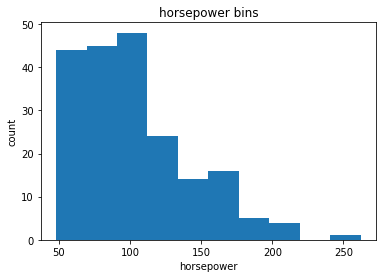

In [85]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Debería pintar un histograma, revisar por qué no lo hace.

<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of horsepower we want to set start_value=min(df["horsepower"]).</p>
<p>Since we want to include the maximum value of horsepower we want to set end_value=max(df["horsepower"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4.</p>

We build a bin array, with a minimum value to a maximum value, with bandwidth calculated above. The bins will be values used to determine when one bin ends and another begins.

In [54]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

TypeError: '<' not supported between instances of 'float' and 'str'

Creo 4 valores equiespaciados que actuarán como fronteras de los bins.

 We set group  names:

In [87]:
group_names = ['Low', 'Medium', 'High']

Añado tres strings que actuarán como mis bins.

 We apply the function "cut" the determine what each value of "df['horsepower']" belongs to. 

In [88]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Como hay 4 valores y 3 bins, usamos include_lowest para que se incluya el sobrante en uno de los otros.

REV para qué se usa exactamente cut, pero creo que es para crear los bins de forma que se asigne el string correspondiente a cada valor.

Lets see the number of vehicles in each bin.

In [89]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Lets plot the distribution of each bin.

Text(0.5, 1.0, 'horsepower bins')

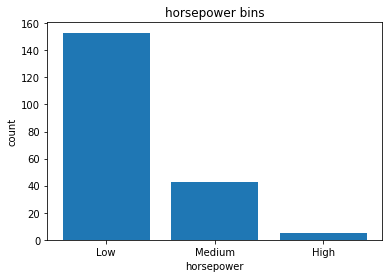

In [90]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Esto es una forma mucho más limpia de dibujar el histograma (en forma de diagrama de barras, es decir, no es un histograma), aunque no se use mucho. 

<p>
    Check the dataframe above carefully, you will find the last column provides the bins for "horsepower" with 3 categories ("Low","Medium" and "High"). 
</p>
<p>
    We successfully narrow the intervals from 57 to 3!
</p>

<h3>Bins visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 

TypeError: 'value' must be an instance of str or bytes, not a float

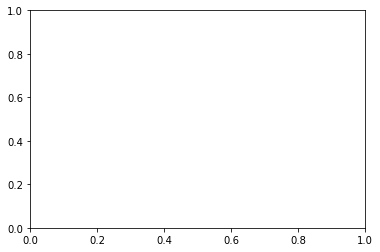

In [55]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

The plot above shows the binning result for attribute "horsepower". 

<h2 id="indicator">Sorting the dataframe</h2>
<b>Example</b>
<p>
    We want to sort the cars of the dataframe by price
</p>

In [56]:
df.sort_values('price').head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,description
134,2,83,subaru,gas,std,two,hatchback,fwd,front,93.7,156.9,63.4,53.7,2050,ohcf,four,97,2bbl,3.62,2.36,9.0,69,4900.0,31,36,5118.0,7.580645,156.9 by 63.4
17,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48,5100.0,47,53,5151.0,5.000000,141.1 by 60.3
47,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1890,ohc,four,91,2bbl,3.03,3.15,9.0,68,5000.0,30,31,5195.0,7.833333,159.1 by 64.2
146,1,87,toyota,gas,std,two,hatchback,fwd,front,95.7,158.7,63.6,54.5,1985,ohc,four,92,2bbl,3.05,3.03,9.0,62,4800.0,35,39,5348.0,6.714286,158.7 by 63.6
73,2,161,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,157.3,64.4,50.8,1918,ohc,four,92,2bbl,2.97,3.23,9.4,68,5500.0,37,41,5389.0,6.351351,157.3 by 64.4


Se usa para ordenar alfabéticamente (o de menor a mayor) un df tomando como referencia la columna/s designada/s. Por defecto es en orden ascendente.

In [57]:
df.sort_values('price',ascending=False).head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,description
71,1,122,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,3.80,3.35,8.0,184,4500.0,14,16,45400.0,16.785714,199.2 by 72.0
15,0,122,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400.0,16,22,41315.0,14.687500,193.8 by 67.9
70,0,122,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,3.80,3.35,8.0,184,4500.0,14,16,40960.0,16.785714,208.1 by 71.7
125,3,122,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.90,9.5,207,5900.0,17,25,37028.0,13.823529,168.9 by 65.0
16,0,122,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400.0,15,20,36880.0,15.666667,197.0 by 70.9


In [58]:
df = df.sort_values(['make','price'],ascending=[False,True])
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,description
190,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,2912,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,12940.0,10.217391,188.8 by 67.2
191,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3034,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,13415.0,10.217391,188.8 by 67.2
192,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,2935,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400.0,24,28,15985.0,9.791667,188.8 by 67.2
193,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3042,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400.0,24,28,16515.0,9.791667,188.8 by 67.2
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,16845.0,10.217391,188.8 by 68.9


<h2 id="indicator">Grouping the dataframe</h2>

De una forma equivalente a como hacemos en SQL, podemos agregar las tablas y sacar resúmenes de los grupos. La operación en pandas se hace en dos fases:

* El `groupby`: donde especificamos la o las columnas por las que agregar
* La aplicación de la función de agregación sobre una o varias columnas

In [59]:
df_reduced = df[['make','fuel-type','body-style','city-L/100km','horsepower','price']]

Para hacerlo únicamente sobre una columna:

In [60]:
df_reduced.groupby('make').max()
# Atención, fíjate bien en lo que hace esto. Saca el valor máximo de fuel-type (alfabéticamente),
#  de horsepower y price (numéricamente), pero no representa filas completas
# Es decir, el audi con body-style "wagon" no tiene ese precio (los máximos no tienen por qué provenir de la misma fila).

,fuel-type,body-style,city-L/100km,horsepower,price
make,,,,,
alfa-romero,gas,hatchback,12.368421,154,16500.0
audi,gas,wagon,13.823529,140,23875.0
bmw,gas,sedan,15.666667,182,41315.0
chevrolet,gas,sedan,6.184211,70,6575.0
dodge,gas,wagon,12.368421,88,12964.0
honda,gas,wagon,9.791667,86,12945.0
isuzu,gas,sedan,9.791667,90,11048.0
jaguar,gas,sedan,18.076923,262,36000.0
mazda,gas,sedan,14.687500,84,18344.0


Los nombres de la columna por la que se agrupa ahora salen en negrita y se han convertido en los índices de la tabla.

Como pone en los comentarios del comando anterior, se está cogiendo el máximo de una variable para cada marca de coche, pero no tiene por qué haber un coche que cumpla con todas las características citadas en las filas que nos está devolviendo.

In [61]:
df_reduced.loc[(df_reduced['make']=='audi')&(df_reduced['body-style']=='wagon')]

,make,fuel-type,body-style,city-L/100km,horsepower,price
7,audi,gas,wagon,12.368421,110,18920.0


In [62]:
df_reduced.groupby('make').price.min()

make
alfa-romero      13495.0
audi             13950.0
bmw              16430.0
chevrolet         5151.0
dodge             5572.0
honda             5399.0
isuzu             6785.0
jaguar           32250.0
mazda             5195.0
mercedes-benz    25552.0
mercury          16503.0
mitsubishi        5389.0
nissan            5499.0
peugot           11900.0
plymouth          5572.0
porsche          22018.0
renault           9295.0
saab             11850.0
subaru            5118.0
toyota            5348.0
volkswagen        7775.0
volvo            12940.0
Name: price, dtype: float64

Para aplicar diferentes resúmenes sobre diferentes columnas

In [99]:
df_reduced.groupby(['make','body-style']).agg({'price': 'mean', 'horsepower': 'max'})

price  horsepower
make          body-style                           
alfa-romero   convertible  14997.500000         111
              hatchback    16500.000000         154
audi          sedan        17647.000000         140
              wagon        18920.000000         110
bmw           sedan        26118.750000         182
chevrolet     hatchback     5723.000000          70
              sedan         6575.000000          70
dodge         hatchback     7819.800000         145
              sedan         7619.666667         102
              wagon         8921.000000          88
honda         hatchback     7054.428571          86
              sedan         9945.000000         101
              wagon         7295.000000          76
isuzu         hatchback    11048.000000          90
              sedan         6785.000000          78
jaguar        sedan        34600.000000         262
mazda         hatchback    10085.000000         135
              sedan        11464.142857         120
mercedes-benz convertible  35056.000000         155
              hardtop      36788.000000         184
              sedan        33074.000000         184
              wagon        28248.000000         123
mercury       hatchback    16503.000000         175
mitsubishi    hatchback     9597.888889         145
              sedan         8434.000000         116
nissan        hardtop       8249.000000          69
              hatchback    14409.000000         200
              sedan         8604.555556         152
              wagon         9915.666667         152
peugot        sedan        15758.571429         142
              wagon        15017.500000          97
plymouth      hatchback     8130.500000         145
              sedan         7150.500000          68
              wagon         8921.000000          88
porsche       convertible  37028.000000         207
              hardtop      33278.000000         207
              hatchback    22018.000000         143
renault       hatchback     9895.000000         104
              wagon         9295.000000         104
saab          hatchback    15013.333333         160
              sedan        15433.333333         160
subaru        hatchback     6591.333333          73
              sedan         9070.600000         111
              wagon         9342.000000         111
toyota        convertible  17669.000000         116
              hardtop       9762.333333         116
              hatchback     9616.000000         161
              sedan         9542.200000         156
              wagon         9836.000000         156
volkswagen    convertible  11595.000000          90
              hatchback     9980.000000          90
              sedan         9673.888889         110
              wagon        12290.000000          88
volvo         sedan        18726.875000         162
              wagon        16293.333333         162

<b>Example</b>
<p>
    We want to find the cheapest car option for each horsepower level.
    
Now that our dataframe is sorted we can get the first row of each group of cars with the same horsepower level to find the cheapest option per level.
</p>

In [64]:
df_reduced.groupby('horsepower').first().head()

,make,fuel-type,body-style,city-L/100km,price
horsepower,,,,,
100,volkswagen,gas,sedan,9.038462,9995.0
101,mazda,gas,hatchback,13.823529,10945.0
102,plymouth,gas,hatchback,9.791667,7957.0
106,volvo,diesel,sedan,9.038462,22470.0
110,volkswagen,gas,sedan,12.368421,13295.0


We can "recover" the horsepower as a column using `reset_index()`

In [65]:
df_reduced.groupby('horsepower').first().reset_index().head()

,horsepower,make,fuel-type,body-style,city-L/100km,price
0,100,volkswagen,gas,sedan,9.038462,9995.0
1,101,mazda,gas,hatchback,13.823529,10945.0
2,102,plymouth,gas,hatchback,9.791667,7957.0
3,106,volvo,diesel,sedan,9.038462,22470.0
4,110,volkswagen,gas,sedan,12.368421,13295.0


In [66]:
df_reduced.groupby('fuel-type').size().reset_index(name='size')

,fuel-type,size
0,diesel,20
1,gas,181


## Merge

Podemos cruzar dos tablas por una o varias columnas en pandas, de forma equivalente a como hacemos en SQL, con [`merge`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html). También podemos usar los distintos tipos de cruce:

* `inner`: para obtener solamente los registros que crucen en ambas tablas
* `left` o `right`: para mantener los registros de una de las dos tablas, crucen o no con la otra
* `outer`: para manter los registros de ambas tablas, crucen o no

<b>Example</b>
<p>
    We want to have a column with the average price per make of car.

First we obtain the average price per make as a dataframe:
</p>

In [67]:
# First we obtain the average price per make as a dataframe
df_price_per_make = df_reduced.groupby('make').price.mean().reset_index()
# df_price_per_make = df_price_per_make.rename({'price':'avg_price_per_make'},axis=1)
df_price_per_make.head()

,make,price
0,alfa-romero,15498.333333
1,audi,17859.166667
2,bmw,26118.750000
3,chevrolet,6007.000000
4,dodge,7875.444444


Then we merge both dataframes together using the columns 'make' as a key

In [68]:
df.merge(df_price_per_make, on='make',how='left',suffixes=(None, "_avg"))

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,description,price_avg
0,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,2912,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,12940.0,10.217391,188.8 by 67.2,18063.181818
1,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3034,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,13415.0,10.217391,188.8 by 67.2,18063.181818
2,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,2935,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400.0,24,28,15985.0,9.791667,188.8 by 67.2,18063.181818
3,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3042,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400.0,24,28,16515.0,9.791667,188.8 by 67.2,18063.181818
4,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,16845.0,10.217391,188.8 by 68.9,18063.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1,122,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500.0,19,25,18920.0,12.368421,192.7 by 71.4,17859.166667
197,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500.0,17,20,23875.0,13.823529,192.7 by 71.4,17859.166667
198,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,168.8 by 64.1,15498.333333
199,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,168.8 by 64.1,15498.333333


Esto es el equivalente a JOIN en SQL (y también tiene las opciones LEFT, RIGHT O CROSS como en SQL).

<h2 id="indicator">Indicator variable (or dummy variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>
<p>
    So we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.
</p>

<p>
    We will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>

In [69]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'description'],
      dtype='object')

get indicator variables and assign it to data frame "dummy_variable_1" 

In [70]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
190,0,1
191,0,1
192,0,1
193,0,1
196,0,1


In [71]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
190,0,1
191,0,1
192,0,1
193,0,1
196,0,1


We now have the value 0 to represent "gas" and 1 to represent "diesel" in the column "fuel-type-diesel". We will now insert this column back into our original dataset. 

In [72]:
# concat data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
# df.drop("fuel-type", axis = 1, inplace=True)

In [73]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,description,fuel-type-diesel,fuel-type-gas
190,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,2912,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,12940.0,10.217391,188.8 by 67.2,0,1
191,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3034,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,13415.0,10.217391,188.8 by 67.2,0,1
192,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,2935,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400.0,24,28,15985.0,9.791667,188.8 by 67.2,0,1
193,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3042,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400.0,24,28,16515.0,9.791667,188.8 by 67.2,0,1
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,16845.0,10.217391,188.8 by 68.9,0,1


The last two columns are now the indicator variable representation of the fuel-type variable. It's all 0s and 1s now.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4: </h1>

<b>As above, create indicator variable to the column of "aspiration": "std" to 0, while "turbo" to 1.</b>
</div>

In [ ]:
# Write your code below and press Shift+Enter to execute 


Double-click <b>here</b> for the solution.

<!-- The answer is below:

# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()

-->

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5: </h1>

<b>Merge the new dataframe to the original dataframe then drop the column 'aspiration'</b>
</div>

In [ ]:
# Write your code below and press Shift+Enter to execute 


Double-click <b>here</b> for the solution.

<!-- The answer is below:

#merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

-->

save the new csv 

In [ ]:
df.to_csv('clean_df.csv')

<hr>
<p>Copyright &copy; 2018 IBM Developer Skills Network. This notebook and its source code are released under the terms of the <a href="https://cognitiveclass.ai/mit-license/">MIT License</a>.</p>